### Part 2
Code along and follow the steps in [this tutorial](https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python#1-loading-the-dataset--exploratory-data-analysis) to use DBSCAN clustering algorithm on articles to try and categorise them into topics. HINT: Install Spacy with following command `!pip install -U pip setuptools wheel && pip install -U spacy && python -m spacy download en_core_web_sm`

[Find more about NLP with Spacy here](https://spacy.io/usage/spacy-101)

**What is Lemmatization? Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”.**

For PCA use this import: `from sklearn.decomposition import PCA` (dimensionality reduction)
For K-Means clustering algorithm: `from sklearn.cluster import KMeans, DBSCAN`

Create a function that can take a cluster number and return all titles in that cluster. Do you see any pattern?

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/programminghistorian/jekyll/gh-pages/assets/clustering-with-scikit-learn-in-python/data/RELIGION_abstracts.csv'
df_abstracts = pd.read_csv(url,sep=',',index_col=[0])
df_abstracts.to_csv('RELIGION_abstracts.csv', encoding='utf-8', index=True)


df_abstracts.head()



,title,abstract,link,volume
0,Norwegian Muslims denouncing terrorism: beyond...,"In contemporary European societies, Muslims ar...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...
1,A comparative analysis of three Sunni Muslim o...,The distinction between ‘moderate’ and ‘radica...,https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...
2,Musical negotiations of a ‘moderate’ versus a ...,"This article explores how in Morocco, music is...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...
3,Aesthetics of authority: ‘Islam Nusantara’ and...,"In Indonesia, Islamic ‘counter-terror culture’...",https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...
4,Countering ‘Islamic’ violent extremism? The im...,This article explores how Muslim-led civil soc...,https://www.tandfonline.com/doi/full/10.1080/0...,https://www.tandfonline.com/loi/rrel20?treeId=...


In [4]:
import spacy
import re
nlp = spacy.load("en_core_web_sm")

def lemmatizeAbstracts(x):
        doc = nlp(x)
        new_text = []
        for token in doc:
            new_text.append(token.lemma_)
        text_string = " ".join(new_text)
        # getting rid of non-word characters
        text_string = re.sub(r"[^\w\s]+", "", text_string)
        text_string = re.sub(r"\s{2,}", " ", text_string)
        return text_string

df_abstracts["abstract_lemma"] = df_abstracts["abstract"].apply(lemmatizeAbstracts)
df_abstracts.to_csv("RELIGION_abstracts_lemmatized.csv")

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")
df_abstracts_tfidf = tfidf.fit_transform(df_abstracts["abstract_lemma"])

In [6]:
tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=250, strip_accents="unicode", min_df=10, max_df=200)
tfidf_religion_array = tfidf.fit_transform(df_abstracts["abstract_lemma"])
df_abstracts_tfidf = pd.DataFrame(tfidf_religion_array.toarray(), index=df_abstracts.index, columns=tfidf.get_feature_names())
df_abstracts_tfidf.describe()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,academic,account,activity,address,african,agency,aim,allow,american,analyse,...,use,value,various,view,way,western,woman,work,world,year
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,...,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.017407,0.017756,0.010633,0.011059,0.011356,0.009061,0.010451,0.009127,0.015210,0.011713,...,0.033074,0.014268,0.013633,0.021310,0.027744,0.021257,0.018406,0.028048,0.028877,0.014563
std,0.063839,0.067667,0.051894,0.047114,0.065659,0.053946,0.045080,0.042445,0.068153,0.051143,...,0.074190,0.061468,0.052642,0.064568,0.062593,0.078245,0.095377,0.074917,0.073751,0.052971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.493789,0.709637,0.509307,0.360085,0.737092,0.658383,0.359469,0.409185,0.617276,0.457299,...,0.609089,0.828761,0.534004,0.515410,0.364839,0.724760,0.941362,0.604694,0.492094,0.365748


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, whiten=False, random_state=42)
abstracts_pca = pca.fit_transform(df_abstracts_tfidf)
df_abstracts_pca = pd.DataFrame(data=abstracts_pca)

In [8]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=100, random_state=42)
abstracts_labels = kmeans.fit_predict(df_abstracts_pca)
df_abstracts_labeled = df_abstracts.copy()
df_abstracts_labeled["cluster"] = abstracts_labels

In [23]:
df_abstracts_labeled[df_abstracts_labeled["cluster"] == 1][["abstract", "cluster"]]



,abstract,cluster
29,While the most well know example of indigenous...,1
79,This article explores the double identities of...,1
127,The paper will examine the intersection betwee...,1
176,Among contemporary sociologists who critically...,1
300,The presence of angels in contemporary Western...,1
307,This paper is a reflection on the attempt of a...,1
337,A case study of sacred landscapes in the conte...,1
404,This article explores the orientations towards...,1
407,Does Usama bin Ladin speak for all Muslims? Is...,1
418,A debate has recently re-emerged about whether...,1


In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
def findOptimalEps(n_neighbors, data):
    '''
    function to find optimal eps distance when using DBSCAN; based on this article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    '''
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

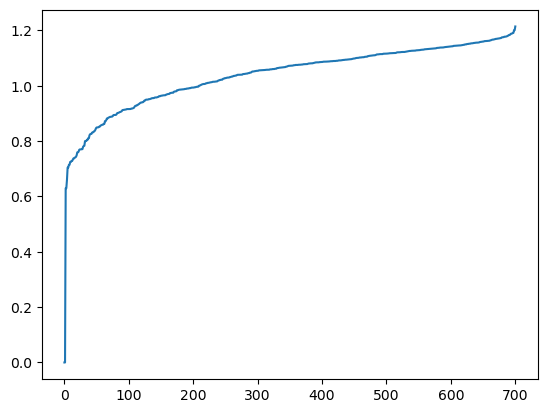

In [11]:
findOptimalEps(2, df_abstracts_tfidf)

In [15]:
dbscan = DBSCAN(eps=0.2, metric="euclidean")
dbscan_labels = dbscan.fit_predict(df_abstracts_pca)
df_abstracts_dbscan = df_abstracts.copy()
df_abstracts_dbscan["cluster"] = dbscan_labels
df_abstracts_dbscan["cluster"].unique()

array([ 0,  1, -1,  2,  3])

In [18]:
df_abstracts_dbscan[df_abstracts_dbscan["cluster"] == 3][["title", "cluster"]]


,title,cluster
305,The neural correlates of religious experience,3
318,Does Taves reconsider experience enough? A cri...,3
339,d'Aquili and Newberg's neurotheology: A hermen...,3
363,The paradox of healing pain,3
535,Visions as ‘Good to Think’: A Cognitive Approa...,3
536,The Role of Visions in Contemporary Egyptian R...,3
592,"The visions of Luciano Perez, contemporary nat...",3
627,The discomfiture of religious experience,3
677,Asking questions about religious experience,3
